# Data Description:
    The data is related with direct marketing campaigns of a  banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
   
   **Objective:**
   **The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**
    
    Steps and tasks:

    Import the necessary libraries
    1.Read the dataset to python environment.
    2.Perfron basic data preprocessing techniques.
    3.Detection and handling outliers.
    4.Perform basic EDA which should include the following and point out your inferences.
    5.Prepare best fit model to the given classification problem
    6.Fine tunig of the model to enhance their performance.
    
   **Dataset parameters:-**
    
    1.age (numeric)
    2.job : type of job  (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
    3.marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4.education (categorical: 'primary','secondary','tertiary','unknown')
    5.default: has credit in default? (categorical: 'no','yes','unknown')
    6.balance: average yearly balance, in euros (numeric)
    7.housing: has housing loan? (categorical: 'no','yes','unknown')
    8.loan: has personal loan? (categorical: 'no','yes','unknown')
    9.contact: contact communication type (categorical:'cellular','telephone')
    10.day: last contact day of the month (numeric 1 -31)
    11.month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
    12.duration: last contact duration, in seconds (numeric).
    13.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    15.previous: number of contacts performed before this campaign and for this client (numeric)
    16.poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')
    17.target: has the client subscribed a term deposit? (binary:"yes","no")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Reading the dataset to python environment

In [2]:
bank=pd.read_csv('bank-full.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
bank.shape

(45211, 17)

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

### Inferences:
     Dataset contains both categorical and numerical features.
     Datset contains totally 17 features including the target variable.
     Datatypes is of integer 64 bit and object types.
     

## 2. Data preprocessing


### Checking for null values or missing values

In [8]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [11]:
### CALCULATING THE MEAN OF DATASET
np.mean(bank,axis=0)

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [12]:
## IDENTIFYING CATEGORICAL AND NON CATEGORICAL FEATURES
target='Target'
non_features=[target]
categorical_features=[col for col in bank.select_dtypes('object').columns if col not in non_features]
numerical_features=[col for col in bank.select_dtypes(np.number).columns if col not in non_features]

print("Categorical Features :\n",categorical_features,"\n")
print("Numerical Features :\n",numerical_features)

Categorical Features :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Numerical Features :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


### The dataset does not contain any null values/missing values.

## Outliers detection and handling

In [13]:
cols = [col for col in bank.columns]
col_with_unknown_value = []
for col in cols:
    if 'unknown' in bank[col].values:
        col_with_unknown_value.append(col)
        
print("Columns with Unknown  as Values -",col_with_unknown_value)

Columns with Unknown  as Values - ['job', 'education', 'contact', 'poutcome']


In [14]:
print("Unknown values count in each columns : \n")
for col in col_with_unknown_value:
    print(col," : ",bank[bank[col].str.contains('unknown')][col].count())

Unknown values count in each columns : 

job  :  288
education  :  1857
contact  :  13020
poutcome  :  36959


In [15]:
### FINDING THE UNIQUE VALUES IN EACH COLUMN
for i in bank.columns:
  print(i," :-")
  print(bank[i].unique())
  print('   ')

age  :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
   
job  :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
   
marital  :-
['married' 'single' 'divorced']
   
education  :-
['tertiary' 'secondary' 'unknown' 'primary']
   
default  :-
['no' 'yes']
   
balance  :-
[ 2143    29     2 ...  8205 14204 16353]
   
housing  :-
['yes' 'no']
   
loan  :-
['no' 'yes']
   
contact  :-
['unknown' 'cellular' 'telephone']
   
day  :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
   
month  :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
   
duration  :-
[ 261  151   76 ... 1298 1246 1556]
   
campaign  :-
[ 1  2  3  5  4  6  7  8

In [16]:
bank['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

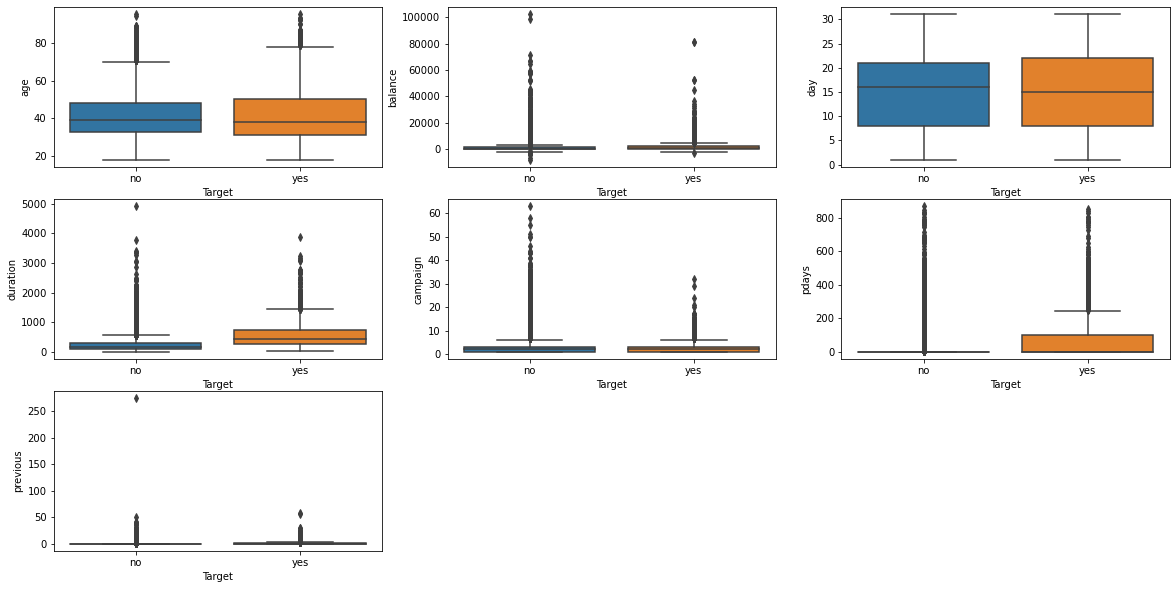

In [17]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=bank[col],x=bank[target]);
plt.show()

##### From the above figure, we can conclude that age, balance, duration, campaign , pdays, previous  columns contains outliers . 

### Handling outliers

In [18]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [19]:
## REPLACING THE UNKNOWN VALUE IN JOB AND EDUCATION COLUMNS.
bank.loc[(bank['education']=='unknown') & (bank['job']=='management'), 'education'] = 'tertiary'
bank.loc[(bank['education']=='unknown') & (bank['job']=='services'), 'education'] = 'secondary'
bank.loc[(bank['education']=='unknown') & (bank['job']=='housemaid'), 'education'] = 'primary'
bank['education'] = bank.education.replace('unknown',bank.education.mode()[0])
bank['job'] = bank.job.replace('unknown',bank.job.mode()[0])

In [20]:
bank['education'].value_counts()

secondary    24772
tertiary     13543
primary       6896
Name: education, dtype: int64

In [21]:
bank['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

## Outliers handling

#### Handling in AGE Column

In [22]:
Q1=np.percentile(bank['age'],25,interpolation='midpoint')
Q2=np.percentile(bank['age'],50,interpolation='midpoint')
Q3=np.percentile(bank['age'],75,interpolation='midpoint')


In [23]:
print(Q1)
print(Q2)
print(Q3)

33.0
39.0
48.0


In [24]:
bank['age'].median()

39.0

In [25]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit of age column",low_lim)
print("Upper limit of age column ",up_lim)

Lower limit of age column 10.5
Upper limit of age column  70.5


In [26]:
outlier=[]
for x in bank['age']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [27]:
print('There are',len(outlier),'Outliers in age column','\n')
print('Outliers are:',outlier)

There are 487 Outliers in age column 

Outliers are: [83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 76, 92, 78, 82, 78, 76, 73, 77, 76, 73, 82, 81, 80

In [28]:
ind1=(bank['age']>up_lim)
bank.loc[ind1].index

Int64Index([29158, 29261, 29263, 29322, 29865, 30225, 30264, 30908, 31051,
            31052,
            ...
            45101, 45104, 45109, 45118, 45141, 45163, 45191, 45204, 45207,
            45208],
           dtype='int64', length=487)

In [29]:
print(*bank.loc[ind1].index, sep=',')

29158,29261,29263,29322,29865,30225,30264,30908,31051,31052,31055,31057,31069,31077,31089,31099,31101,31108,31116,31125,31130,31145,31149,31151,31183,31189,31233,31255,31261,31285,31341,31365,31383,31393,31395,31414,31447,31527,31569,31647,31723,31816,32009,32032,32064,32068,32074,32089,32105,32160,32204,32321,32451,32689,32699,32802,33017,33360,33414,33455,33699,33706,33710,33719,33729,33751,33752,33766,33775,33777,33780,33803,33810,33811,33815,33827,33846,33860,34128,40363,40367,40368,40374,40381,40383,40389,40401,40402,40412,40471,40481,40515,40524,40526,40538,40561,40569,40571,40584,40586,40595,40621,40645,40655,40657,40674,40676,40688,40699,40702,40710,40712,40726,40732,40759,40766,40786,40789,40792,40816,40837,40838,40843,40851,40864,40872,40896,40910,40913,40932,40947,40954,40957,40972,40978,40987,40988,41007,41036,41069,41099,41101,41104,41129,41136,41162,41171,41179,41183,41197,41237,41242,41257,41258,41290,41291,41294,41331,41346,41352,41376,41387,41405,41406,41413,41423,4143

In [30]:
bank.drop([29158,29261,29263,29322,29865,30225,30264,30908,31051,31052,
           31055,31057,31069,31077,31089,31099,31101,31108,31116,31125,31130,31145,31149,31151,31183,31189,31233,
           31255,31261,31285,31341,31365,31383,31393,31395,31414,31447,31527,31569,31647,31723,31816,
           32009,32032,32064,32068,32074,32089,32105,32160,32204,32321,32451,32689,32699,32802,33017,33360,33414,
           33455,33699,33706,33710,33719,33729,33751,33752,33766,33775,33777,33780,33803,33810,33811,33815,33827,33846,33860,
           34128,40363,40367,40368,40374,40381,40383,40389,40401,40402,40412,40471,40481,40515,40524,40526,40538,40561,40569,
           40571,40584,40586,40595,40621,40645,40655,40657,40674,40676,40688,40699,40702,40710,40712,40726,40732,40759,40766,
           40786,40789,40792,40816,40837,40838,40843,40851,40864,40872,40896,40910,40913,40932,40947,40954,40957,40972,40978,
           40987,40988,41007,41036,41069,41099,41101,41104,41129,41136,41162,41171,41179,41183,41197,41237,41242,41257,41258,
           41290,41291,41294,41331,41346,41352,41376,41387,41405,41406,41413,41423,41439,41448,41454,41469,41470,41505,41506,
           41515,41516,41522,41524,41543,41554,41557,41561,41562,41569,41594,41599,41600,41610,41615,41625,41630,41635,41649,
           41654,41663,41708,41733,41744,41753,41754,41755,41758,41768,41779,41789,41792,41817,41819,41822,41823,41837,41841,
           41842,41843,41851,41855,41858,41866,41880,41882,41885,41902,41903,41918,41923,41927,41934,41946,41947,41949,41951,
           41959,41963,41969,41979,41981,41982,42001,42004,42005,42026,42027,42044,42061,42074,42081,42120,42144,42160,42162,
           42164,42181,42193,42197,42198,42208,42239,42244,42248,42250,42251,42264,42266,42267,42268,42272,42284,42325,42333,
           42335,42364,42374,42376,42408,42419,42437,42440,42441,42459,42460,42462,42463,42481,42483,42494,42502,42504,42526,
           42545,42558,42573,42574,42582,42607,42619,42635,42650,42662,42690,42693,42709,42714,42727,42730,42731,42737,42747
           ,42759,42765,42779,42795,42824,42825,42841,42848,42859,42863,42869,42874,42881,42891,42896,42906,42914,42919,42932,
           42945,42989,42990,42995,42996,43004,43009,43037,43052,43080,43103,43106,43117,43129,43136,43142,43154,43158,43167,
           43194,43213,43238,43250,43251,43268,43273,43276,43281,43284,43290,43291,43296,43299,43300,43315,43332,43343,43354,
           43365,43367,43385,43393,43394,43423,43431,43440,43446,43457,43477,43500,43508,43525,43527,43532,43535,43537,43555,
           43569,43580,43614,43620,43631,43635,43653,43654,43662,43666,43671,43696,43722,43731,43732,43736,43738,43745,43760,
           43773,43775,43832,43893,43896,43903,43915,43931,43944,43953,43974,44002,44045,44050,44051,44095,44102,44109,44127,
           44139,44143,44145,44151,44173,44234,44262,44279,44316,44334,44347,44356,44361,44370,44410,44415,44420,44466,44479,
           44480,44483,44504,44529,44534,44634,44643,44669,44688,44695,44701,44734,44738,44746,44752,44767,44780,44788,44791,44794,44800,44806,44812,44813,44830,44875,44892,44893,
           44894,44899,44932,44939,44952,44996,45010,45063,45078,45095,45101,45104,45109,45118,45141,45163,45191,45204,45207,45208],inplace=True)

Text(0.5, 1.0, 'box plot of age')

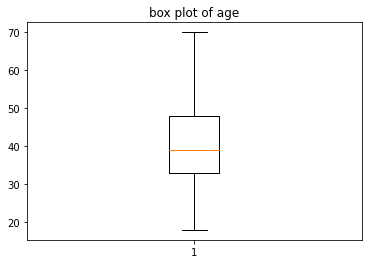

In [31]:
plt.boxplot(bank['age'])
plt.title("box plot of age")

#### Handling in Balance, Duration, Campaign, Pdays, Previous

In [32]:
withOutliers = [ 'balance', 'duration', 'campaign','pdays','previous']

IQR=bank[withOutliers].describe().T['75%']-bank[withOutliers].describe().T['25%']

Lower_lim,Upper_lim = bank[withOutliers].describe().T['25%']-(IQR*1.5),bank[withOutliers].describe().T['75%']+(IQR*1.5)


for i in withOutliers:
    bank[i][bank[i]>Upper_lim[i]]=Upper_lim[i];
    bank[i][bank[i]<Lower_lim[i]]=Lower_lim[i]

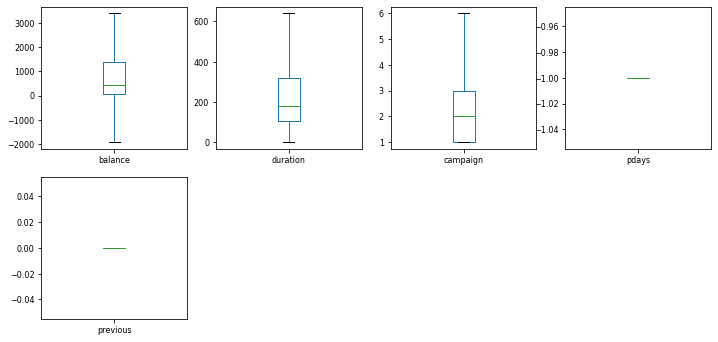

In [33]:
bank[withOutliers].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

## Feature Reduction

Here , we are dropping less meaningful features.

In [34]:
bank.shape

(44724, 17)

In [35]:
##Removing the rows where call duration last for less than 10 sec.

In [36]:
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)

In [37]:
print('Rows count having call duration less than 10 Sec -\t',bank[bank.duration < 10/60]['duration'].count())

Rows count having call duration less than 10 Sec -	 342


In [38]:
bank = bank.drop(bank[bank.duration < 10/60].index, axis = 0, inplace = False)

In [39]:
bank.shape

(44382, 17)

## 4. EXPLORATORY DATA ANALYSIS

In [40]:
## SHAPE OF THE DATASET
bank.shape

(44382, 17)

In [41]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [42]:
bank.Target.value_counts()

no     39312
yes     5070
Name: Target, dtype: int64

In [43]:
bank.loan.value_counts()

no     37192
yes     7190
Name: loan, dtype: int64

Text(0.5, 1.0, 'Job Distribution')

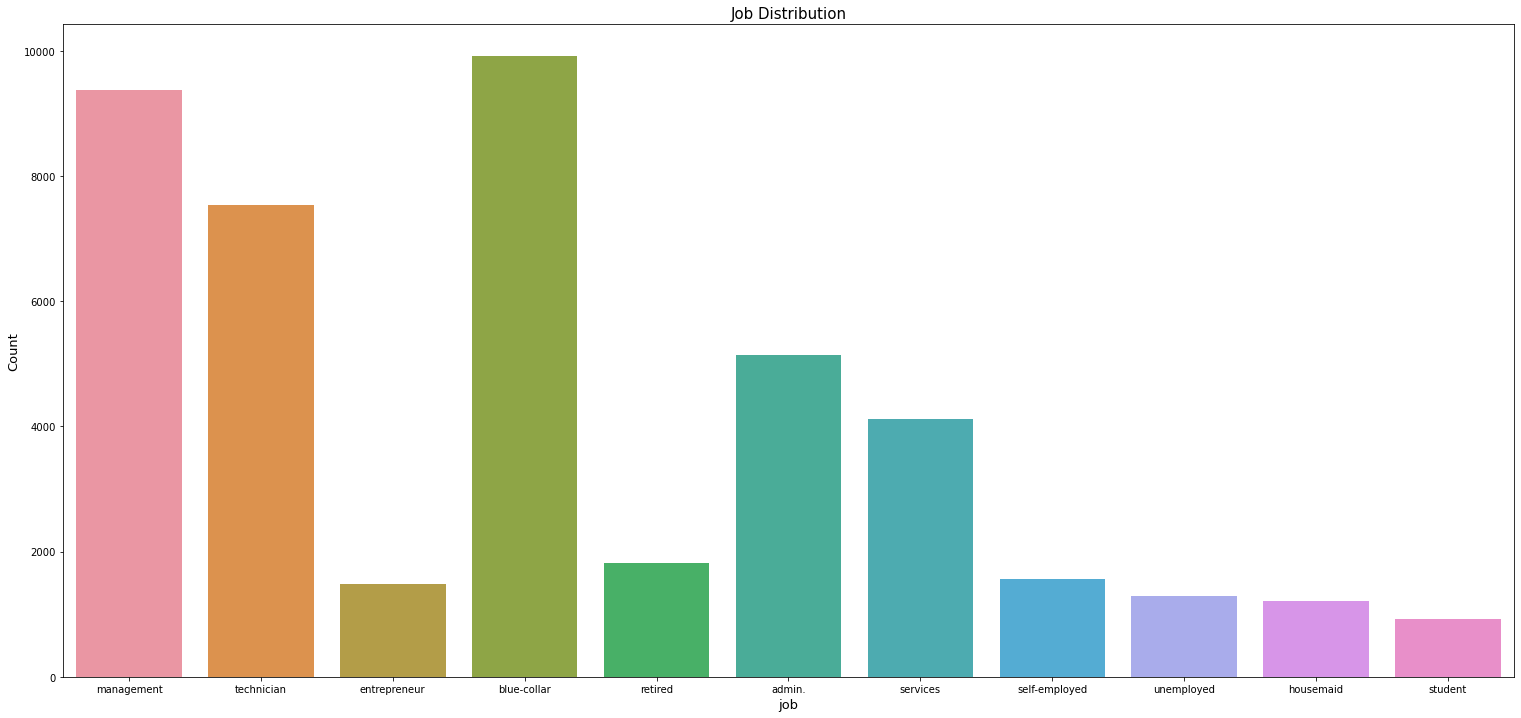

In [44]:
## JOB DISTRIBUTION ANALYSIS

plt.figure(figsize = (26,12))
sns.countplot(x = 'job',data = bank)
plt.xlabel("job", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Job Distribution', fontsize=15)

**More people are in blue-collar sector. Then management>technician>admin job>services>retired>self-employed>enetrepreneur>unemployed>housemaid>student**

Text(0.5, 1.0, 'Marital Status Analysis')

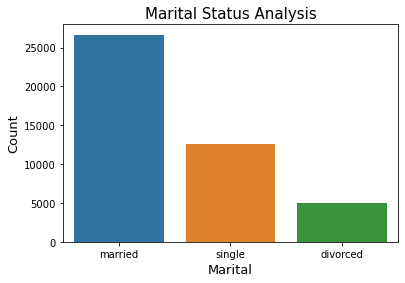

In [45]:
## MARITAAL STATUS ANALYSIS

sns.countplot(x = 'marital',data = bank)
plt.xlabel("Marital", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Marital Status Analysis', fontsize=15)

**Most people are maaried who attend the calls.**

<AxesSubplot:xlabel='education', ylabel='count'>

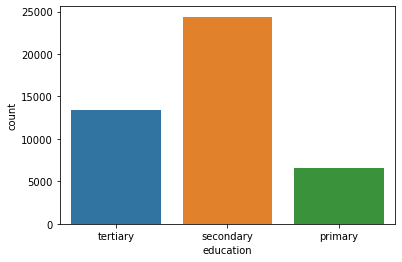

In [46]:
sns.countplot(x='education', data=bank)

**Secondary education is higher than tertiary and primary.**

<AxesSubplot:xlabel='education', ylabel='age'>

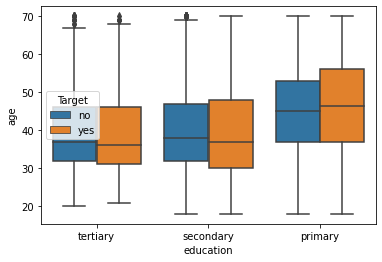

In [47]:
sns.boxplot(x='education',y='age',hue='Target',data=bank)

**People with  primary education have taken deposits than the rest.**

<AxesSubplot:xlabel='marital', ylabel='age'>

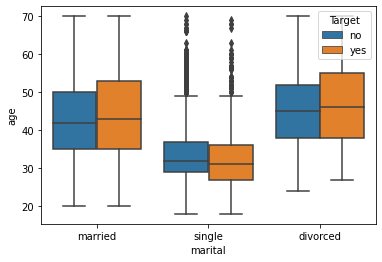

In [48]:
sns.boxplot(x='marital',y='age',hue='Target',data=bank)

**Married and divorced people are on higher chances to suscribe a term depost compared to single people.**

Text(0.5, 1.0, 'Default Loan Distribution')

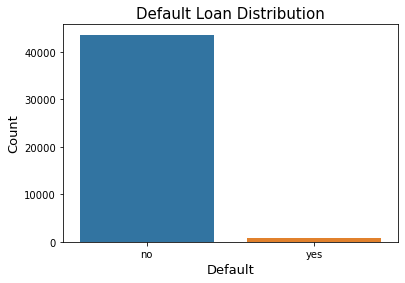

In [50]:
sns.countplot(x = 'default',data = bank)
plt.xlabel("Default", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Default Loan Distribution', fontsize=15) 

**Clients having default loan are less than that of clients don't have.**

Text(0.5, 1.0, 'Loan Distribution')

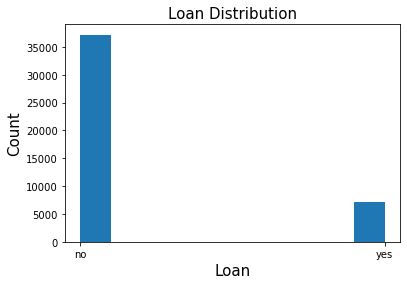

In [51]:
plt.hist(x = 'loan',data = bank)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)## Most of the clients doesnot have personal loans.


Text(0.5, 1.0, 'Contact Distribution')

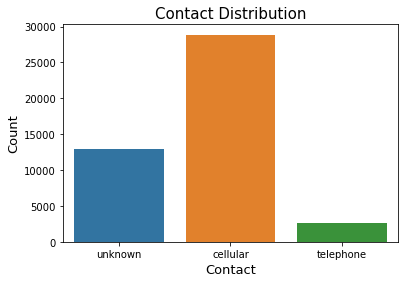

In [52]:
sns.countplot(x = 'contact',data = bank)
plt.xlabel("Contact", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Contact Distribution', fontsize=15)

In [53]:
print('Contact:\n Unknown Contact:'     , bank[bank['contact'] == 'unknown']     ['age'].count(),
              '\n Cellular Contact:'   , bank[bank['contact'] == 'cellular']    ['age'].count(),
              '\n Telephone Contact:'  , bank[bank['contact'] == 'telephone']   ['age'].count())

Contact:
 Unknown Contact: 12874 
 Cellular Contact: 28858 
 Telephone Contact: 2650


**Mostly clients are connected through cell phones.**

<AxesSubplot:xlabel='day'>

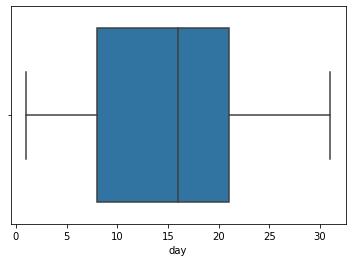

In [54]:
sns.boxplot(x=bank["day"])

**The higher no.of calls are during 12-22 days of a month.**

<AxesSubplot:xlabel='duration'>

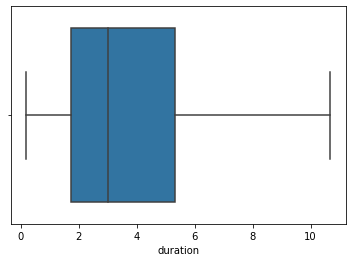

In [55]:
sns.boxplot(x=bank["duration"])## Duration of a call to customer

Text(0.5, 1.0, 'Campaign Distribution')

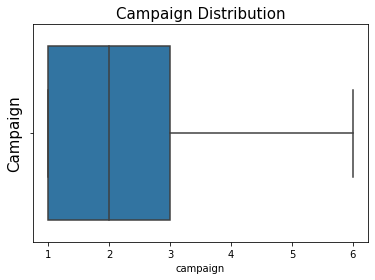

In [56]:
sns.boxplot(x = 'campaign', data = bank)
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Poutcome distribution')

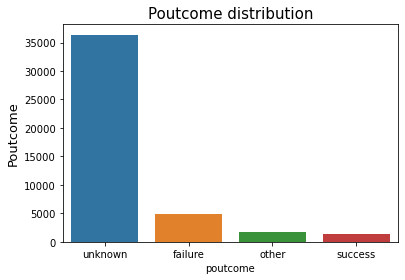

In [57]:
sns.countplot(x = 'poutcome', data = bank)
plt.ylabel("Poutcome", fontsize=13)
plt.title('Poutcome distribution', fontsize=15)

**The outcome of the campaign is mostly unknown.**

Text(0.5, 1.0, 'Target distribution')

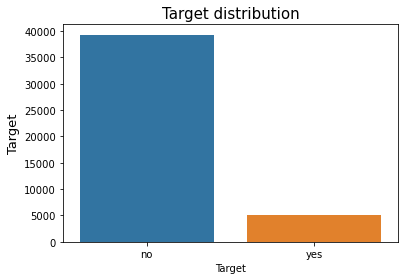

In [58]:
sns.countplot(x = 'Target', data =bank)
plt.ylabel("Target", fontsize=13)
plt.title('Target distribution', fontsize=15)

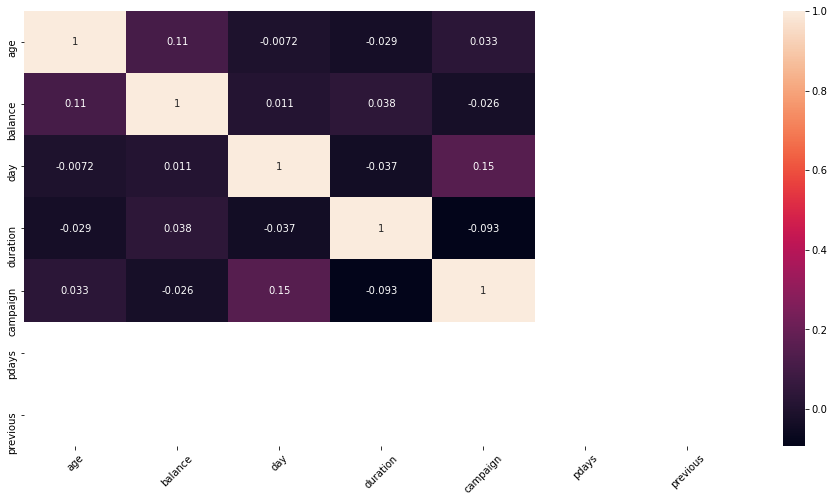

In [59]:
fig= plt.figure(figsize=(16, 8))
sns.heatmap(bank.corr(), annot=True);
plt.xticks(rotation=45);

 **From the figure , we can't see any strong positive correlation between the features, 
 day& age, day& duration constitute negative correlation.**

(array([0.5, 1.5]), [Text(0.5, 0, 'no'), Text(1.5, 0, 'yes')])

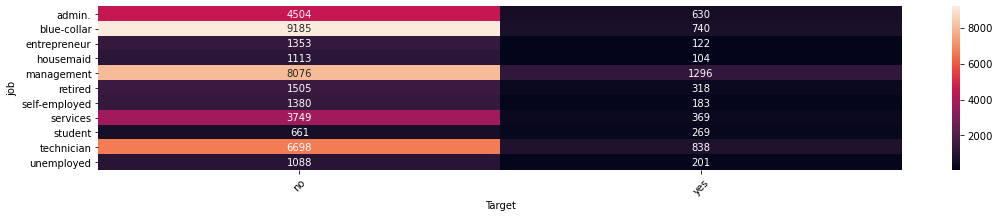

In [60]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['job'], columns=bank['Target']), annot=True, fmt='g')
plt.xticks(rotation=45)

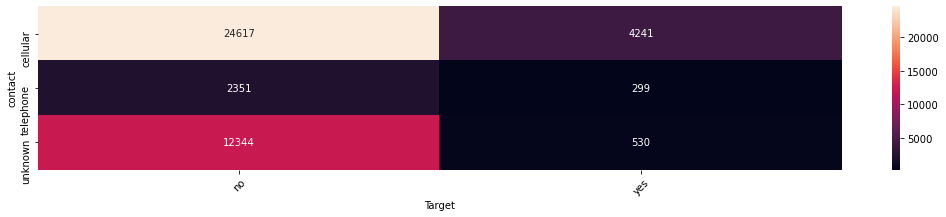

In [61]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['contact'], columns=bank['Target']), annot=True,fmt='g')
plt.xticks(rotation=45);

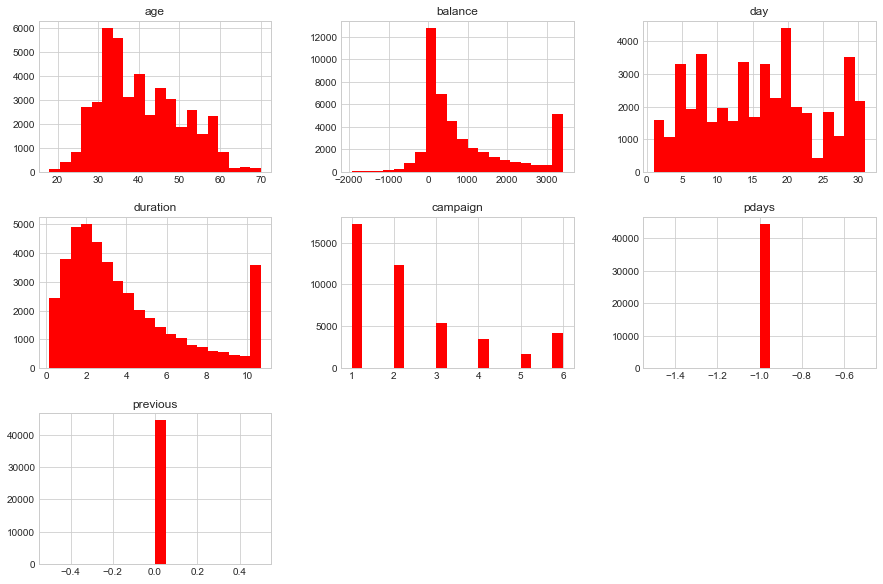

In [62]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()

### INFERENCES:-

The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.

     If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.
    .Married people are more ,we can see in graph clearly.
    .The clients having secondary education are more .And the clients having unknown eduction are less .
    .The clients having bydefault credit are less than those who don't have bydefault credit.
    .The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.
    .The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.
    .The count of a clients who can be contacted by Cellular is high that the others.

In [63]:
new_data=bank## Renaming the dataset to a new name.

In [64]:
new_data.shape

(44382, 17)

### Feature reduction

In [65]:
data = new_data.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
data.head()### Here we are removing the above columns since they contribute less to our prediction

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
0,58,no,2143.0,yes,no,5,4.35,1,-1,0,no
1,44,no,29.0,yes,no,5,2.52,1,-1,0,no
2,33,no,2.0,yes,yes,5,1.27,1,-1,0,no
3,47,no,1506.0,yes,no,5,1.53,1,-1,0,no
4,33,no,1.0,no,no,5,3.30,1,-1,0,no


**Encoding the categorical features using label encoder.**

In [66]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 

In [67]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
0,58,0,2143.0,1,0,5,4.35,1,-1,0,no
1,44,0,29.0,1,0,5,2.52,1,-1,0,no
2,33,0,2.0,1,1,5,1.27,1,-1,0,no
3,47,0,1506.0,1,0,5,1.53,1,-1,0,no
4,33,0,1.0,0,0,5,3.30,1,-1,0,no


## 5.Modelling the dataset

**Since this is a classification problem we are using classification models.**

In [68]:
# split the dataset into trainig and test set to train and evaluate the model respectively

X = data.drop(['Target'],axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=0)


In [69]:
X_train.shape

(31067, 10)

In [70]:
y_train.shape

(31067,)

In [71]:
X_test.shape

(13315, 10)

In [72]:
y_test.shape

(13315,)

### *Logistic Regression Model 

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [74]:
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

precision is : 0.7150399431187933
recall is : 0.5692923241435093
F1 score is : 0.5901904759649961


In [75]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11765
         yes       0.53      0.16      0.24      1550

    accuracy                           0.89     13315
   macro avg       0.72      0.57      0.59     13315
weighted avg       0.86      0.89      0.86     13315

[[11551   214]
 [ 1307   243]]


In [76]:
log=[]
log.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### *KNN Classifier Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [79]:
acc_values

[0.8708974840405558,
 0.8817123544874202,
 0.8790086368757041,
 0.882238077356365,
 0.8809613218174991,
 0.8826135936913255,
 0.8825384904243334,
 0.8841156590311678,
 0.8834397296282388,
 0.8843409688321442,
 0.8838903492301915,
 0.8838152459631994]

Text(0, 0.5, 'accuracy value')

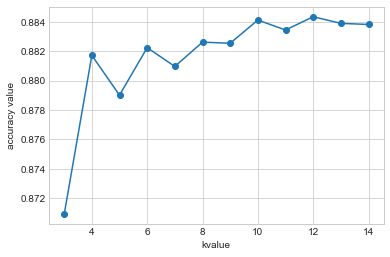

In [80]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy value')

In [81]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred =  classifier.predict(X_test)

In [82]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.8826135936913255
Precision is : 0.6678049598895679
Recall is : 0.5154121711473343
F1 score is : 0.5026703870539584


In [83]:
confusion_matrix(y_test,y_pred)

array([[11695,    70],
       [ 1493,    57]], dtype=int64)

In [84]:
log.append(['KNN Classification',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

### *Decision Tree Model 

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_model=DecisionTreeClassifier()

In [87]:
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.8413819001126549
Precision is : 0.6241866597873134
Recall is : 0.6335215168007897
F1 score is : 0.6285314195805016


In [88]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91     11765
         yes       0.33      0.36      0.35      1550

    accuracy                           0.84     13315
   macro avg       0.62      0.63      0.63     13315
weighted avg       0.85      0.84      0.84     13315

Confusion Matrix is 
 [[10641  1124]
 [  988   562]]


In [89]:
log.append(['Decision Tree',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

### Random Forest Classifier Model

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("accuracy score is",accuracy_score(y_test,y_pred))


accuracy score is 0.8859932407059707


In [91]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.8859932407059707
Precision is : 0.7145784466392824
Recall is : 0.6128324856394719
F1 score is : 0.6407825273199901


In [92]:
log.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

### Gradient booster Model

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(X_train,y_train)
y_pred=gm.predict(X_test)
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred,average='macro'))
print("Recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Accuracy is : 0.8886969583176868
Precision is : 0.7302702768469927
Recall is : 0.5975575449323445
F1 score is : 0.6263470029185064


In [94]:
log.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [95]:
df1 = pd.DataFrame(log, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df1

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.59019,0.88577,0.71504,0.56929
1,KNN Classification,0.50267,0.88261,0.66780,0.51541
2,Decision Tree,0.62853,0.84138,0.62419,0.63352
3,Random Forest,0.64078,0.88599,0.71458,0.61283
4,Gradient Booster,0.62635,0.88870,0.73027,0.59756


### Inference :-  From all the above models Gradient Booster model shows better accuracy score than others

## Feature importance

In [96]:
pd.Series(gm.feature_importances_,index=X.columns).sort_values(ascending=False)*100

duration    68.636123
housing     12.597289
age          7.571389
day          4.217612
balance      3.901969
campaign     1.798795
loan         1.276822
default      0.000000
pdays        0.000000
previous     0.000000
dtype: float64

## 6. Tuning of hyper parameter

In [106]:
gm.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(max_depth=5, n_estimators=1000)

In [107]:
gm=GradientBoostingClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,)
gm.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=1000)

In [108]:
y_pred=gm.predict(X_test)
print("f1 score",f1_score(y_test,y_pred,  pos_label='no'))


f1 score 0.9374043274998964


In [109]:
print("Accuracy is :",accuracy_score(y_test,y_pred))

Accuracy is : 0.8863687570409313


#### f1_score of the gradient boosting model has been incresed by tuning the parameters

### DSA-NORKA BATCH -3
#### TEAM-13:-
   **KARUNNIA MENON M, LIYA CHACKO PANAKKAL, SAHEER MOHAMMED**